In [7]:
import pandas as pd

geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

df = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\ml-latest-small\\keywords.csv')
df.head()

def reg(row):
    for region, cities in geo_data.items():
        for city in cities:
            if city in row['keyword']:
                return region

    return 'undefined'

df['region'] = df.apply(reg, axis=1)

show = df[df['region'] != 'undefined']
print(show[0:10])

                        keyword   shows          region
127                авито москва  979292           Центр
370    авито ру санкт петербург  425134    Северо-Запад
564   погода в санкт петербурге  292489    Северо-Запад
849             авито ярославль  209581           Центр
1063        фарпост владивосток  176951  Дальний Восток
1236       банк санкт петербург  174375    Северо-Запад
1259                     москва  153050           Центр
1346            санкт петербург  144232    Северо-Запад
1396            гисметео москва  140279           Центр
1482           госуслуги москва  133061           Центр


In [10]:
df = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\ml-latest-small\\movies.csv')
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [34]:
import pandas as pd
unames=["user_id", "gender", "age", "occupation", "zip"]
users= pd.read_table("users.dat", sep="::", header=None, names=unames, engine="python")
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [35]:
rnames=["user_id", "movie_id", "rating", "timestamp"]
ratings= pd.read_csv("ratings1.csv")
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


In [37]:
mnames=["movie_id", "title", "genres"]
movies=pd.read_csv("movies1.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [82]:
ratings.rename(columns = {'userId':'user_id', 'movieId':'movie_id'}, inplace = True)

movies.rename(columns = {'movieId':'movie_id'}, inplace = True)

data = pd.merge(pd.merge(ratings, users), movies)
data.drop(['zip', 'gender', 'age', 'occupation'],axis=1, inplace=True)
#data.drop('gender', axis=1, inplace=True)
#data.drop('occupation', axis=1, inplace=True)
#data.drop('age', axis=1, inplace=True)

data

,user_id,movie_id,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance
...,...,...,...,...,...,...
899101,6040,4225,3.0,986447883,"Dish, The (2001)",Comedy
899102,6040,4226,5.0,986447883,Memento (2000),Mystery|Thriller
899103,6040,4235,5.0,986700948,Amores Perros (Love's a Bitch) (2000),Drama|Thriller
899104,6040,5060,4.0,944961781,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War


<Axes: xlabel='year', ylabel='rating'>

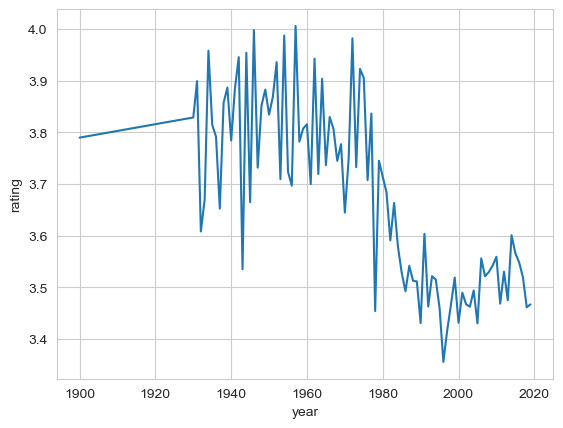

In [56]:
import seaborn as sns

years = list(range(1930, 2021))

def production_year(row):
    for year in years:
        if str(year) in row:
            return year
    return 1900

data['year'] = data['title'].apply(production_year)
mean_rating_all_movies = data[['rating', 'year']].groupby(by = 'year').mean().sort_values('rating', ascending=False)

sns.set_style("whitegrid")
sns.lineplot(x = mean_rating_all_movies.index, y = mean_rating_all_movies['rating'])


<Axes: xlabel='year', ylabel='rating'>

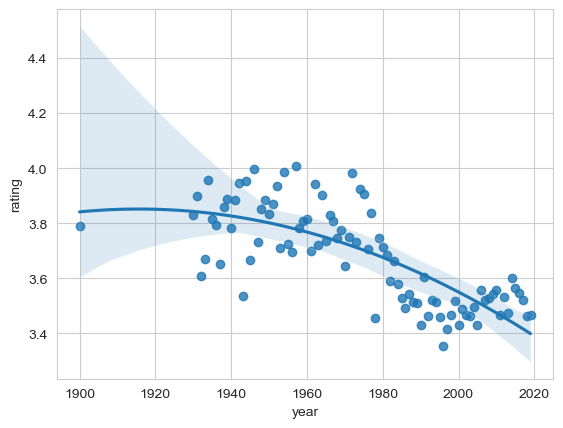

In [80]:
sns.regplot(data = mean_rating_all_movies,x=mean_rating_all_movies.index,y=mean_rating_all_movies['rating'], order=2.8, ci=100)

Продвинутый пандас

In [4]:
import pandas as pd

log = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\Pandas hard\\visit_log.csv', sep=';')
log.head(10)

,timestamp,visit_id,url,region,user_id,traffic_source
0,1549980692,e3b0c44298,https://host.ru/3c19b4ef7371864fa3,Russia,b1613cc09f,yandex
1,1549980704,6e340b9cff,https://host.ru/c8d9213a31839f9a3a,Russia,4c3ec14bee,direct
2,1549980715,96a296d224,https://host.ru/b8b58337d272ee7b15,Russia,a8c40697fb,yandex
3,1549980725,709e80c884,https://host.ru/b8b58337d272ee7b15,Russia,521ac1d6a0,yandex
4,1549980736,df3f619804,https://host.ru/b8b58337d272ee7b15,Russia,d7323c571c,yandex
5,1549980742,8855508aad,https://host.ru/df646c3676cc259fa0,Russia,fc43898e47,yandex
6,1549980742,b0f66adc83,https://host.ru/b8b58337d272ee7b15,Russia,13fc55e781,paid
7,1549980754,837885c8f8,https://host.ru/108ce4b365afb7b88e,Russia,cb5082b6f6,direct
8,1549980760,af5570f5a1,https://host.ru/3004a8273caeef2867,China,45664f7af2,direct
9,1549980765,3e7077fd2f,https://host.ru/df646c3676cc259fa0,Russia,6f9de8c8b6,email


In [6]:
%%time
log.loc[log.traffic_source.isin(['yandex', 'google']), 'source_type'] = 'organic'
log.loc[(log.traffic_source.isin(['paid', 'email'])) & (log.region == 'Russia '), 'source_type'] = 'ad'
log.loc[(log.traffic_source.isin(['paid', 'email'])) & (log.region != 'Russia'), 'source_type'] = 'other'
log.loc[pd.isnull(log.source_type), 'source_type'] = log.traffic_source
log.head(10)

CPU times: total: 15.6 ms
Wall time: 12.9 ms


,timestamp,visit_id,url,region,user_id,traffic_source,source_type
0,1549980692,e3b0c44298,https://host.ru/3c19b4ef7371864fa3,Russia,b1613cc09f,yandex,organic
1,1549980704,6e340b9cff,https://host.ru/c8d9213a31839f9a3a,Russia,4c3ec14bee,direct,direct
2,1549980715,96a296d224,https://host.ru/b8b58337d272ee7b15,Russia,a8c40697fb,yandex,organic
3,1549980725,709e80c884,https://host.ru/b8b58337d272ee7b15,Russia,521ac1d6a0,yandex,organic
4,1549980736,df3f619804,https://host.ru/b8b58337d272ee7b15,Russia,d7323c571c,yandex,organic
5,1549980742,8855508aad,https://host.ru/df646c3676cc259fa0,Russia,fc43898e47,yandex,organic
6,1549980742,b0f66adc83,https://host.ru/b8b58337d272ee7b15,Russia,13fc55e781,paid,paid
7,1549980754,837885c8f8,https://host.ru/108ce4b365afb7b88e,Russia,cb5082b6f6,direct,direct
8,1549980760,af5570f5a1,https://host.ru/3004a8273caeef2867,China,45664f7af2,direct,direct
9,1549980765,3e7077fd2f,https://host.ru/df646c3676cc259fa0,Russia,6f9de8c8b6,email,email


In [7]:
web = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\Pandas hard\\URLs.txt')
web.head(10)

,url
0,/world/
1,/latest/
2,/?updated=top
3,/politics/36188461-s-marta-zhizn-rossiyan-susc...
4,/world/36007585-tramp-pridumal-kak-reshit-ukra...
5,/science/36157853-nasa-sobiraet-ekstrennuyu-pr...
6,/video/36001498-poyavilis-pervye-podrobnosti-g...
7,/world/36007585-tramp-pridumal-kak-reshit-ukra...
8,/science/
9,/sport/


In [10]:
web.loc[web.url.str.contains(r'/\d{8}-')].head(10)

,url
3,/politics/36188461-s-marta-zhizn-rossiyan-susc...
4,/world/36007585-tramp-pridumal-kak-reshit-ukra...
5,/science/36157853-nasa-sobiraet-ekstrennuyu-pr...
6,/video/36001498-poyavilis-pervye-podrobnosti-g...
7,/world/36007585-tramp-pridumal-kak-reshit-ukra...
10,/middleeast/36131117-divizion-s-400-ne-zametil...
11,/economics/36065674-rossiyane-vozmutilis-minim...
12,/politics/36118047-otets-24-detey-potreboval-i...
13,/travel/36194479-v-sheremetevo-passazhiry-ustr...
14,/politics/35638742-nesolidno-mariya-zaharova-s...


Задание 3


In [11]:
df = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\Pandas hard\\ml-latest-small\\ratings.csv')
df.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [14]:
df_filtered = df.groupby('userId').agg(['min', 'max', 'count'])['timestamp']
df_filtered.head(10)

,min,max,count
userId,,,
1,1260759108,1260759205,20
2,835355395,835356246,76
3,1298861589,1298932787,51
4,949778714,949982274,204
5,1163373044,1163375145,100
6,1108134263,1109258285,44
7,851866703,851869291,88
8,1154389340,1154474527,116
9,938627748,939122916,45


In [22]:
def filter_users(row):
    if row['count'] > 100:
        return row['max'] - row['min']
    
df_filtered['lifetime'] = df_filtered.apply(filter_users, axis=1)
df_filtered = df_filtered.reset_index()
df_filtered[['userId', 'lifetime']].dropna().head(10)


,userId,lifetime
3,4,203560.0
7,8,85187.0
14,15,471393496.0
16,17,8053.0
18,19,5282.0
20,21,1365432.0
21,22,91491.0
22,23,18342129.0
25,26,20267261.0
29,30,115852276.0


In [23]:
rzd = pd.DataFrame(
    {
        'client_id': [111, 112, 113, 114, 115],
        'rzd_revenue': [1093, 2810, 10283, 5774, 981]
    }
)

auto = pd.DataFrame(
    {
        'client_id': [113, 114, 115, 116, 117],
        'auto_revenue': [57483, 83, 912, 4834, 98]
    }
)

air = pd.DataFrame(
    {
        'client_id': [115, 116, 117, 118],
        'air_revenue': [81, 4, 13, 173]
    }
)

client_base = pd.DataFrame(
    {
        'client_id': [111, 112, 113, 114, 115, 116, 117, 118],
        'address': ['Комсомольская 4', 'Энтузиастов 8а', 'Левобережная 1а', 'Мира 14', 'ЗЖБИиДК 1',
                    'Строителей 18', 'Панфиловская 33', 'Мастеркова 4']
    }
)



In [24]:
table_1 = rzd.merge(auto, on = 'client_id', how = 'outer').merge(air, on = 'client_id', how = 'outer')
table_1

,client_id,rzd_revenue,auto_revenue,air_revenue
0,111,1093.0,NaN,NaN
1,112,2810.0,NaN,NaN
2,113,10283.0,57483.0,NaN
3,114,5774.0,83.0,NaN
4,115,981.0,912.0,81.0
5,116,NaN,4834.0,4.0
6,117,NaN,98.0,13.0
7,118,NaN,NaN,173.0


In [25]:
table_2 = table_1.merge(client_base, on = 'client_id', how = 'outer')
table_2

,client_id,rzd_revenue,auto_revenue,air_revenue,address
0,111,1093.0,NaN,NaN,Комсомольская 4
1,112,2810.0,NaN,NaN,Энтузиастов 8а
2,113,10283.0,57483.0,NaN,Левобережная 1а
3,114,5774.0,83.0,NaN,Мира 14
4,115,981.0,912.0,81.0,ЗЖБИиДК 1
5,116,NaN,4834.0,4.0,Строителей 18
6,117,NaN,98.0,13.0,Панфиловская 33
7,118,NaN,NaN,173.0,Мастеркова 4
